In [1]:
import numpy as np
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.environ['rapp'])
sys.path.append(os.environ['raco'])
sys.path.append(os.environ['rapl'] + '/azav')
from azav_util import plot_azav
from common import *
from plotcommon import *
from constants import *

sys.path.append(os.environ['rapl'] + '/timetrace')
from cla_util import *
from plotcommon import *
from timey_util import *

labelsize = 8

In [2]:
dirname = '/nobackup/lmatilsk/case_M_mtrace_indalt_bro/'
filestem = 'mtrace_'
#filestem = 'tmspec_'
datadir = dirname + 'data/'
mtracedir = datadir + filestem + 'mmax010/'

In [3]:
radlevs = get_slice_levels(dirname)
print ('irvals     =', radlevs.inds)
print ('rvals      = ' + arr_to_str(radlevs.radius, "%1.3e"))
print ('rvals/rsun = ' + arr_to_str(radlevs.radius/rsun, "%.3f"))

irvals     = [ 10  15  22  27  32  38  43  50  55  56  59  73  82  85  99 137 147 155
 161 168 176 182]
rvals      = [6.502e+10 6.394e+10 6.184e+10 6.005e+10 5.812e+10 5.581e+10 5.402e+10 5.192e+10 5.084e+10 5.068e+10 5.028e+10 4.985e+10 4.940e+10 4.919e+10 4.805e+10 4.599e+10 4.414e+10 4.198e+10 4.018e+10 3.810e+10 3.606e+10 3.494e+10]
rvals/rsun = [0.935 0.919 0.889 0.863 0.835 0.802 0.776 0.746 0.731 0.728 0.723 0.717 0.710 0.707 0.691 0.661 0.634 0.603 0.578 0.548 0.518 0.502]


In [4]:
# Get necessary grid info
di_grid = get_grid_info(dirname)
rr = di_grid['rr']
cost = di_grid['cost']
sint = di_grid['sint']
tt_lat = di_grid['tt_lat']
xx = di_grid['xx']
tt = di_grid['tt']
nt = di_grid['nt']
nr = di_grid['nr']
nphi = di_grid['nphi']

In [5]:
count = 0
for rval in radlevs.radius/rsun:
    print ("ir = %i, r/rsun = %0.3f" %(count, rval))
    count+=1

ir = 0, r/rsun = 0.935
ir = 1, r/rsun = 0.919
ir = 2, r/rsun = 0.889
ir = 3, r/rsun = 0.863
ir = 4, r/rsun = 0.835
ir = 5, r/rsun = 0.802
ir = 6, r/rsun = 0.776
ir = 7, r/rsun = 0.746
ir = 8, r/rsun = 0.731
ir = 9, r/rsun = 0.728
ir = 10, r/rsun = 0.723
ir = 11, r/rsun = 0.717
ir = 12, r/rsun = 0.710
ir = 13, r/rsun = 0.707
ir = 14, r/rsun = 0.691
ir = 15, r/rsun = 0.661
ir = 16, r/rsun = 0.634
ir = 17, r/rsun = 0.603
ir = 18, r/rsun = 0.578
ir = 19, r/rsun = 0.548
ir = 20, r/rsun = 0.518
ir = 21, r/rsun = 0.502


In [18]:
irval = 14
part = 'real'
mval = 1
ntimes = 500
ntimes = None

if part == 'imag':
    partfunc = np.imag
elif part == 'abs':
    partfunc = np.abs
elif part == 'real':
    partfunc = np.real

# read in induction data

qval = 803
the_file = get_widest_range_file(mtracedir, filestem + 'qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
b = di['vals'][:, mval, :]
# compute derivative 
times = di['times']
dbdt = np.gradient(b, times, axis=0)

# poloidal field for mean shear
qval = 801
the_file = get_widest_range_file(mtracedir, filestem + 'qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
br = di['vals'][:, mval, :]

qval = 802
the_file = get_widest_range_file(mtracedir, filestem + 'qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
bt = di['vals'][:, mval, :]

qval = 3003
the_file = get_widest_range_file(mtracedir, filestem + 'qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
ind = di['vals'][:, mval, :]

qval = 3006
the_file = get_widest_range_file(mtracedir, filestem + 'qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
shear = di['vals'][:, mval, :]

qval = 3009
the_file = get_widest_range_file(mtracedir, filestem + 'qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
adv = di['vals'][:, mval, :]

qval = 3109
the_file = get_widest_range_file(mtracedir, filestem + 'qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
advvert = di['vals'][:, mval, :]

qval = 3012
the_file = get_widest_range_file(mtracedir, filestem + 'qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
comp = di['vals'][:, mval, :]

qval = 1615
the_file = get_widest_range_file(mtracedir, filestem + 'qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
diff = thin_data(di['vals'][:, mval, :], ntimes)

qval = 3124
the_file = get_widest_range_file(mtracedir, filestem + 'qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
diffvert = thin_data(di['vals'][:, mval, :], ntimes)

qval = 3
the_file = get_widest_range_file(mtracedir, filestem + 'qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
vp_m0 = di['vals'][:, 0, :]/nphi

reading /nobackup/lmatilsk/case_M_mtrace_indalt_bro/data/mtrace_mmax010/mtrace_qval0803_irval14-12301000_14066000.pkl
reading /nobackup/lmatilsk/case_M_mtrace_indalt_bro/data/mtrace_mmax010/mtrace_qval0801_irval14-12301000_14066000.pkl
reading /nobackup/lmatilsk/case_M_mtrace_indalt_bro/data/mtrace_mmax010/mtrace_qval0802_irval14-12301000_14066000.pkl
reading /nobackup/lmatilsk/case_M_mtrace_indalt_bro/data/mtrace_mmax010/mtrace_qval3003_irval14-12301000_14066000.pkl
reading /nobackup/lmatilsk/case_M_mtrace_indalt_bro/data/mtrace_mmax010/mtrace_qval3006_irval14-12301000_14066000.pkl
reading /nobackup/lmatilsk/case_M_mtrace_indalt_bro/data/mtrace_mmax010/mtrace_qval3009_irval14-12301000_14066000.pkl
reading /nobackup/lmatilsk/case_M_mtrace_indalt_bro/data/mtrace_mmax010/mtrace_qval3109_irval14-12301000_14066000.pkl
reading /nobackup/lmatilsk/case_M_mtrace_indalt_bro/data/mtrace_mmax010/mtrace_qval3012_irval14-12301000_14066000.pkl
reading /nobackup/lmatilsk/case_M_mtrace_indalt_bro/data

In [7]:
# get frequencies,
dummy, freq = my_nfft(times, vp_m0)
freq

array([-2.20142640e-06, -2.19893328e-06, -2.19644016e-06, ...,
        2.19394704e-06,  2.19644016e-06,  2.19893328e-06])

In [8]:
def freqfilter(arr, times, freqmax=None):
    arrcopy = np.copy(arr)
    # first, transform to spectral space
    arr_tmspec, freq = my_nfft(times, arrcopy)
    if not freqmax is None: # don't filter if freqmax is None
        ifreq1 = np.argmin(np.abs(freq + freqmax))
        ifreq2 = np.argmin(np.abs(freq - freqmax))
        # filter out the high frequencies
        arr_tmspec[:ifreq1+1] = 0.0
        arr_tmspec[ifreq2:] = 0.0
    return my_infft(times, arr_tmspec)

In [19]:
# apply filter to the mtraces
#freqmax = None
freqmax = 2e-8 # 20 nHz

b = thin_data(freqfilter(b, times, freqmax), ntot=ntimes)
br = thin_data(freqfilter(br, times, freqmax), ntot=ntimes)
bt = thin_data(freqfilter(bt, times, freqmax), ntot=ntimes)
dbdt = thin_data(freqfilter(dbdt, times, freqmax), ntot=ntimes)
ind = thin_data(freqfilter(ind, times, freqmax), ntot=ntimes)
shear = thin_data(freqfilter(shear, times, freqmax), ntot=ntimes)
adv = thin_data(freqfilter(adv, times, freqmax), ntot=ntimes)
advvert = thin_data(freqfilter(advvert, times, freqmax), ntot=ntimes)
comp = thin_data(freqfilter(comp, times, freqmax), ntot=ntimes)
diff = thin_data(freqfilter(diff, times, freqmax), ntot=ntimes)
diffvert = thin_data(freqfilter(diffvert, times, freqmax), ntot=ntimes)
vp_m0 = thin_data(freqfilter(vp_m0, times, freqmax), ntot=ntimes)

In [10]:
# Let's remove the differential rotation 
times = thin_data(di['times'], ntimes)
prot = 2*np.pi/8.61e-6
t = times/prot
xx_tl = radlevs.radius[irval]*sint.reshape((1, nt))
dbdt_nodr = dbdt + 1.0j*vp_m0/xx_tl*b
adv_nodr = adv + 1.0j*vp_m0/xx_tl*b
ind_nodr = ind + 1.0j*vp_m0/xx_tl*b

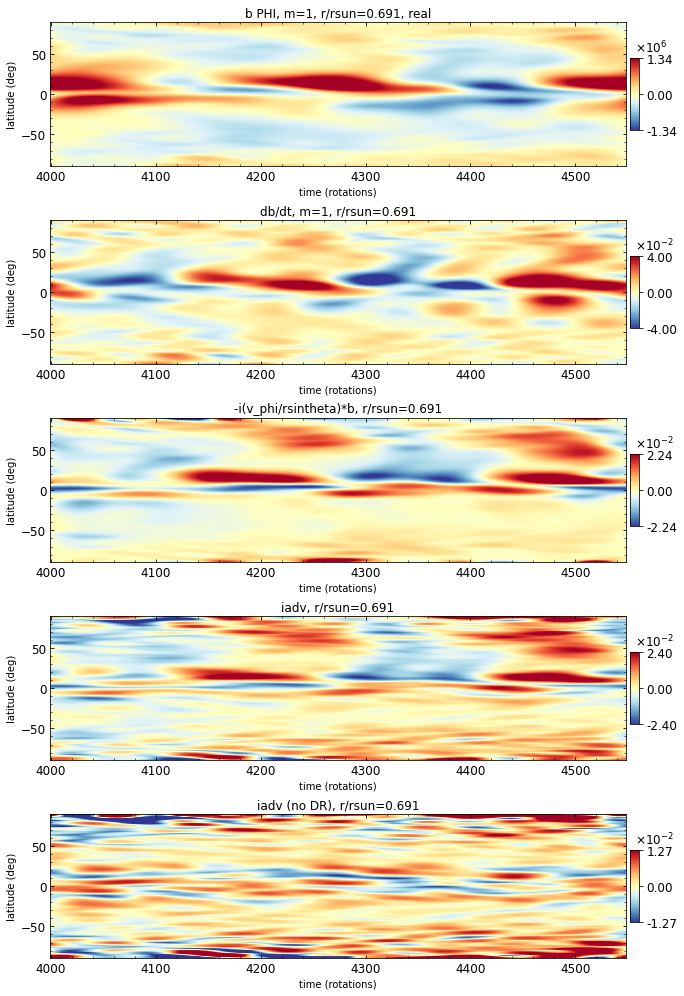

In [11]:
# plot to see if it makes sense...
fig, axs, fpar = make_figure(nplots=5, ncol=1, sub_width_inches=8, sub_height_inches=2, margin_right_inches=3/4,\
                            margin_top_inches=1/4)

ax = axs[0, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('b PHI, m=%i, r/rsun=%0.3f' %(mval, radlevs.radius[irval]/rsun) + ', ' + part)
field = partfunc(b)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[1, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('db/dt, m=%i, r/rsun=%0.3f' %(mval, radlevs.radius[irval]/rsun))
field = partfunc(dbdt)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[2, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('-i(v_phi/rsintheta)*b, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(-1.0j*vp_m0/xx_tl*b)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[3, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('iadv, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(adv)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[4, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('iadv (no DR), r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(adv_nodr)
plot_timey(field, times/prot, tt_lat, fig, ax)

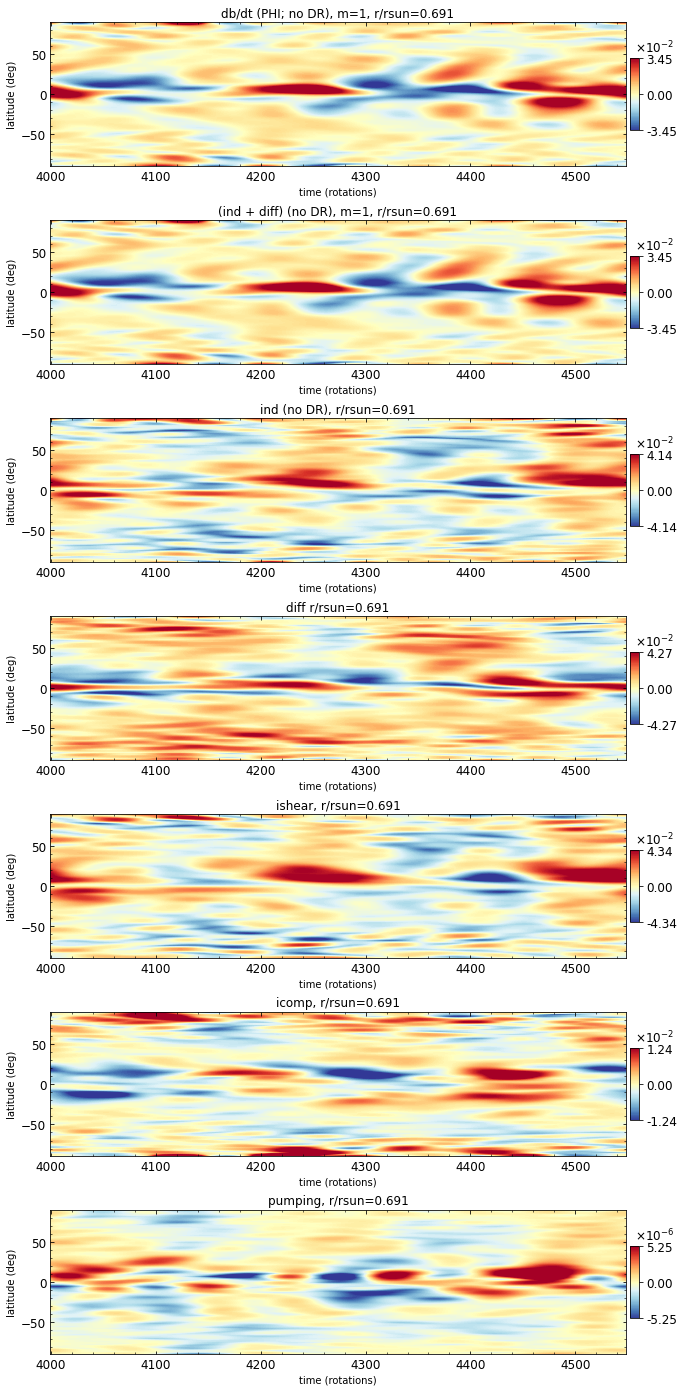

In [16]:
# now plot induction equation (remove advection by DR)

fig, axs, fpar = make_figure(nplots=7, ncol=1, sub_width_inches=8, sub_height_inches=2, margin_right_inches=3/4,\
                            margin_top_inches=1/4, margin_left_inches=5/8)

ax = axs[0, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('db/dt (PHI; no DR), m=1, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(dbdt_nodr)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[1, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('(ind + diff) (no DR), m=1, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(ind_nodr + diff)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[2, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('ind (no DR), r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(ind_nodr)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[3, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('diff r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(diff)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[4, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('ishear, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(shear)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[5, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('icomp, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(comp)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[6, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('pumping, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(advvert)
plot_timey(field, times/prot, tt_lat, fig, ax)

savename = 'ialtp_' + part + '_mval%03i_rval%0.3f.png' %(mval, radlevs.radius[irval]/rsun) 
plt.savefig('ialtp_nodr/' + savename, dpi=300)

In [20]:
# get differential rotation
the_file = get_widest_range_file('/nobackup/lmatilsk/case_M/data/', 'AZ_Avgs')
print("reading " + the_file)
di_az = get_dict(the_file)
vals_az = di_az['vals']
lut_az = di_az['lut']
Omega = vals_az[:, :, lut_az[3]]/xx

# get the Omega derivatives
amom_visc_r = vals_az[:, :, lut_az[1813]]
amom_visc_t = vals_az[:, :, lut_az[1814]]
rr_2d = di_grid['rr_2d']
sint_2d = di_grid['sint_2d']
eq = get_eq(dirname)
nu = eq.nu.reshape((1, nr))
rho = eq.rho.reshape((1, nr))
mu = rho*nu
prefactor = -1./(rho*nu*rr_2d**2.*sint_2d**2.)
dOmdr = prefactor*amom_visc_r
dOmdt = prefactor*amom_visc_t

# get poloidal field 


# get induction from mean shear
xx_loc = radlevs.radius[irval]*sint.reshape((1, nt))
dOmdr_loc = dOmdr[:, radlevs.inds[irval]].reshape((1, nt))
dOmdt_loc = dOmdt[:, radlevs.inds[irval]].reshape((1, nt))
ms_r = xx_loc*dOmdr_loc*br
ms_t = xx_loc*dOmdt_loc*bt
ms_tot = ms_r + ms_t

reading /nobackup/lmatilsk/case_M/data/AZ_Avgs-07802500_50220000.pkl


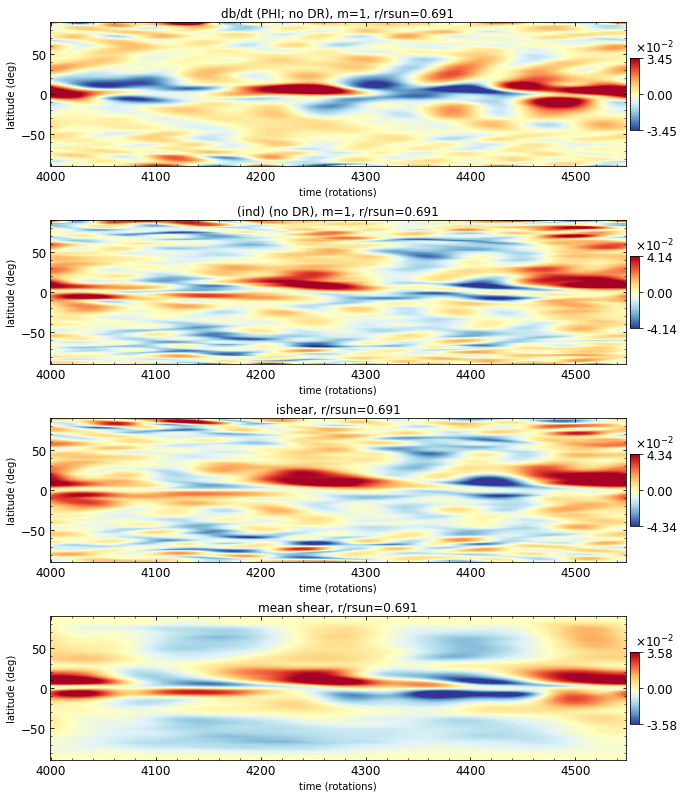

In [21]:
# Plot mean shear as well

fig, axs, fpar = make_figure(nplots=4, ncol=1, sub_width_inches=8, sub_height_inches=2, margin_right_inches=3/4,\
                            margin_top_inches=1/4, margin_left_inches=5/8)

ax = axs[0, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('db/dt (PHI; no DR), m=1, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(dbdt_nodr)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[1, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('(ind) (no DR), m=1, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(ind_nodr)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[2, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('ishear, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(shear)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[3, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('mean shear, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(ms_tot)
plot_timey(field, times/prot, tt_lat, fig, ax)

savename = 'meanshear_' + part + '_mval%03i_rval%0.3f.png' %(mval, radlevs.radius[irval]/rsun) 
plt.savefig('ialtp_nodr/' + savename, dpi=300)

In [14]:
np.shape(thin_data(b, ntimes))

(1766, 384)